R-squared for y ~ X1: -0.46
R-squared for y ~ X2: 1.00
R-squared for y ~ X1 + X2: 1.00
Ratio of maximum and minimum R-squared values: -2.15


IndexError: index 2 is out of bounds for axis 0 with size 2

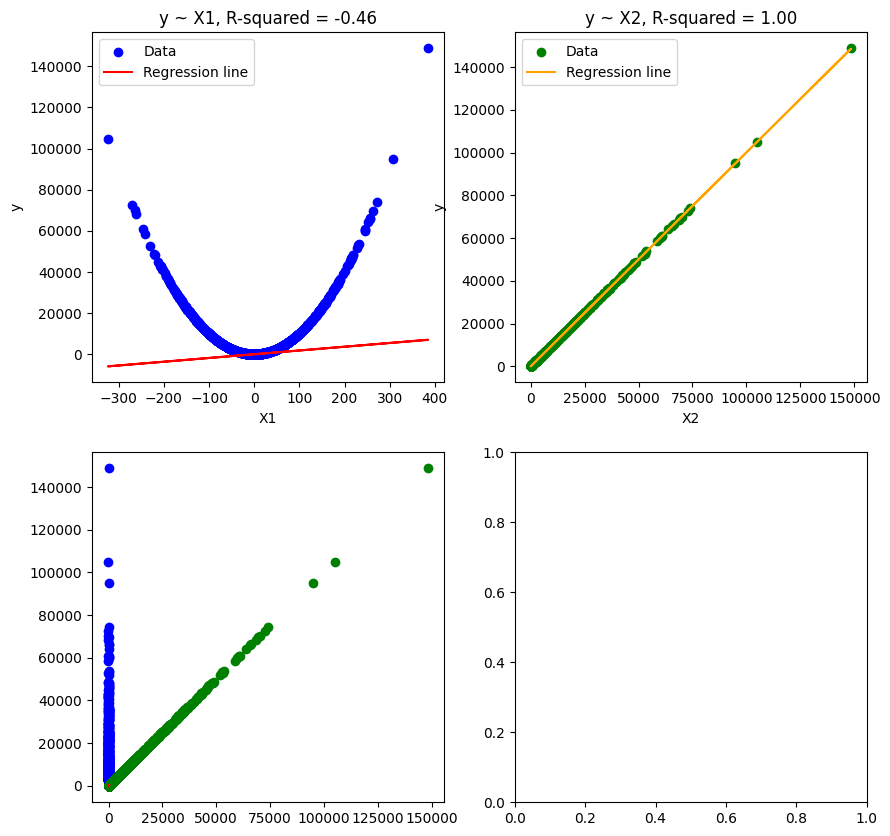

In [14]:
# Import numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate some random data for X1, X2, and y
n = 1000  # Number of observations
X1 = np.random.normal(size=n,scale=100)  # X1 is a standard normal variable
X2 = np.random.normal(size=n,scale=10) + X1**2  # X2 is another standard normal variable
y = (
    X1 + X2
)  # + np.random.normal(size=n) # y is a linear combination of X1 and X2 plus some noise

# Fit OLS models for y ~ X1 and y ~ X2
beta1, r1, _, _ = np.linalg.lstsq(X1.reshape(-1, 1), y, rcond=None)  # OLS for y ~ X1
beta2, r2, _, _ = np.linalg.lstsq(X2.reshape(-1, 1), y, rcond=None)  # OLS for y ~ X2

# Compute the R-squared values for each model
R2_1 = 1 - r1 / np.sum((y - np.mean(y)) ** 2)  # R-squared for y ~ X1
R2_2 = 1 - r2 / np.sum((y - np.mean(y)) ** 2)  # R-squared for y ~ X2

# Print the results
print(f"R-squared for y ~ X1: {R2_1[0]:.2f}")
print(f"R-squared for y ~ X2: {R2_2[0]:.2f}")

# Fit OLS model for y ~ X1 + X2
X = np.column_stack((X1, X2))  # Combine X1 and X2 into a matrix
beta, r, _, _ = np.linalg.lstsq(X, y, rcond=None)  # OLS for y ~ X1 + X2

# Compute the R-squared value for the model
R2 = 1 - r / np.sum((y - np.mean(y)) ** 2)  # R-squared for y ~ X1 + X2

# Print the result
print(f"R-squared for y ~ X1 + X2: {R2[0]:.2f}")

# Compute the ratio of the maximum and minimum R-squared values
R2_values = [R2_1[0], R2_2[0], R2[0]]  # List of R-squared values
R2_max = max(R2_values)  # Maximum R-squared value
R2_min = min(R2_values)  # Minimum R-squared value
R2_ratio = R2_max / R2_min  # Ratio of maximum and minimum R-squared values

# Print the result
print(f"Ratio of maximum and minimum R-squared values: {R2_ratio:.2f}")

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the data and the regression lines for each model
axes[0, 0].scatter(X1, y, color="blue", label="Data")  # Scatter plot of y ~ X1
axes[0, 0].plot(
    X1, beta1 * X1, color="red", label="Regression line"
)  # Regression line of y ~ X1
axes[0, 0].set_xlabel("X1")  # Set x-axis label
axes[0, 0].set_ylabel("y")  # Set y-axis label
axes[0, 0].set_title(f"y ~ X1, R-squared = {R2_1[0]:.2f}")  # Set title
axes[0, 0].legend()  # Show legend

axes[0, 1].scatter(X2, y, color="green", label="Data")  # Scatter plot of y ~ X2
axes[0, 1].plot(
    X2, beta2 * X2, color="orange", label="Regression line"
)  # Regression line of y ~ X2
axes[0, 1].set_xlabel("X2")  # Set x-axis label
axes[0, 1].set_ylabel("y")  # Set y-axis label
axes[0, 1].set_title(f"y ~ X2, R-squared = {R2_2[0]:.2f}")  # Set title
axes[0, 1].legend()  # Show legend

axes[1, 0].scatter(X[:, 0], y, color="blue", label="X1")  # Scatter plot of y ~ X1
axes[1, 0].scatter(X[:, 1], y, color="green", label="X2")  # Scatter plot of y ~ X2
axes[1, 0].plot(
    X[:, 0], beta[0] + beta[1] * X[:, 0], color="red", label="Regression line for X1"
)  # Regression line of y ~ X1
axes[1, 0].plot(
    X[:, 1], beta[0] + beta[2] * X[:, 1], color="orange", label="Regression line for X2"
)  # Regression line of y ~ X2
axes[1, 0].set_xlabel("X")  # Set x-axis label
axes[1, 0].set_ylabel("y")  # Set y-axis label
axes[1, 0].set_title(f"y ~ X, R-squared = {R2[0]:.2f}")  # Set title
axes[1, 0].legend()  # Show legend

# Plot the histogram of the residuals for each model
axes[1, 1].hist(
    y - beta1 * X1, bins=10, color="red", alpha=0.5, label="Residuals of y ~ X1"
)  # Histogram of residuals of y ~ X1
axes[1, 1].hist(
    y - beta2 * X2, bins=10, color="orange", alpha=0.5, label="Residuals of y ~ X2"
)  # Histogram of residuals of y ~ X2
axes[1, 1].hist(
    y - (beta[0] + beta[1] * X[:, 0] + beta[2] * X[:, 1]),
    bins=10,
    color="purple",
    alpha=0.5,
    label="Residuals of y ~ X",
)  # Histogram of residuals of y ~ X
axes[1, 1].set_xlabel("Residuals")  # Set x-axis label
axes[1, 1].set_ylabel("Frequency")  # Set y-axis label
axes[1, 1].set_title("Histogram of residuals for each model")  # Set title
axes[1, 1].legend()  # Show legend

# Show the figure
plt.show()

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Create a sample size of 20
n = 10

# Generate 20 random numbers from a normal distribution with mean 0 and standard deviation 1
x1 = np.random.normal(0, 1, n)

# Create a dependent variable y as a linear function of x1 plus some random noise
y = 0.1 * x1 + 0.2 * np.random.normal(0, 1, n)

# Create another independent variable x2 as the difference between y and x1
x2 = y - x1

# Fit three linear regression models
model1 = LinearRegression().fit(x1.reshape(-1, 1), y)
model2 = LinearRegression().fit(x2.reshape(-1, 1), y)
model3 = LinearRegression().fit(np.column_stack((x1, x2)), y)
model4 = LinearRegression().fit(x1.reshape(-1, 1), x2.reshape(-1, 1))

# Print the R-squared values of each model
print(model1.score(x1.reshape(-1, 1), y))
print(model2.score(x2.reshape(-1, 1), y))
print(model3.score(np.column_stack((x1, x2)), y))
print(model4.score(x1.reshape(-1, 1), x2.reshape(-1,1)))


0.12062426978484586
0.017696403761294333
1.0
0.9518301246862704


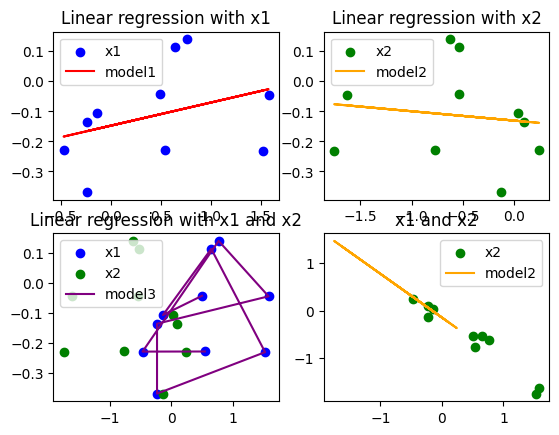

In [2]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2)

# Plot the original data points and the regression lines
ax[0, 0].scatter(x1, y, color='blue', label='x1')
ax[0, 0].plot(x1, model1.predict(x1.reshape(-1, 1)), color='red', label='model1')
ax[0, 0].set_title('Linear regression with x1')
ax[0, 0].legend()

ax[0, 1].scatter(x2, y, color='green', label='x2')
ax[0, 1].plot(x2, model2.predict(x2.reshape(-1, 1)), color='orange', label='model2')
ax[0, 1].set_title('Linear regression with x2')
ax[0, 1].legend()

ax[1, 0].scatter(x1, y, color='blue', label='x1')
ax[1, 0].scatter(x2, y, color='green', label='x2')
ax[1, 0].plot(x1, model3.predict(np.column_stack((x1, x2))), color='purple', label='model3')
ax[1, 0].set_title('Linear regression with x1 and x2')
ax[1, 0].legend()

# Hide the unused subplot
# ax[1, 1].axis('off')

ax[1, 1].scatter(x1, x2, color='green', label='x2')
ax[1, 1].plot(x2, model4.predict(x2.reshape(-1, 1)), color='orange', label='model2')
ax[1, 1].set_title('x1 and x2')
ax[1, 1].legend()

# Show the figure
plt.show()